# **Objective**

To predict whether a person is having a job (i.e. placed) or not.

# **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import os

# **Importing the Data**

In [2]:
df = pd.read_csv(r"/content/Job_Placement_Data.csv")

# Making a copy of the data to save original data from manipulations.

In [3]:
data = df.copy()

# **EDA**

In [4]:
data.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

**So, no missing value in our data.**

In [5]:
data[data.duplicated()]

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status


**No duplicate values exist in our data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


# **Visualizations**

<AxesSubplot:xlabel='gender', ylabel='count'>

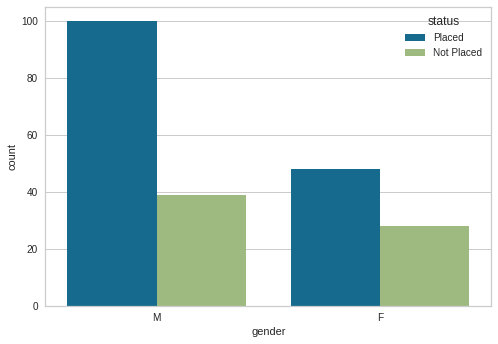

In [7]:
sns.countplot(data=data,x='gender',hue='status')

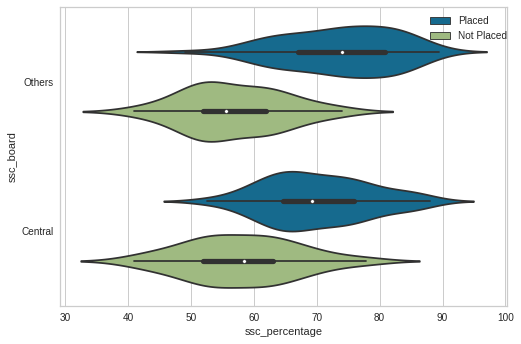

In [8]:
sns.violinplot(x='ssc_percentage',y='ssc_board',hue='status',data=data)
plt.legend(bbox_to_anchor=(1.02,1))

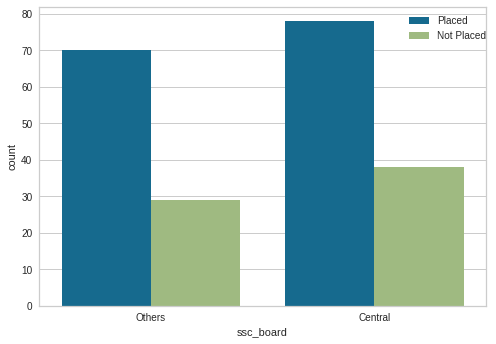

In [9]:
sns.countplot(data=data,x='ssc_board',hue='status')
plt.legend(bbox_to_anchor=(1.02,1))

<AxesSubplot:xlabel='ssc_board', ylabel='ssc_percentage'>

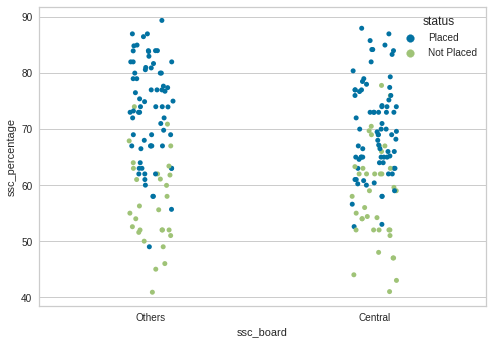

In [10]:
sns.stripplot(data=data,x='ssc_board',y='ssc_percentage',hue='status')

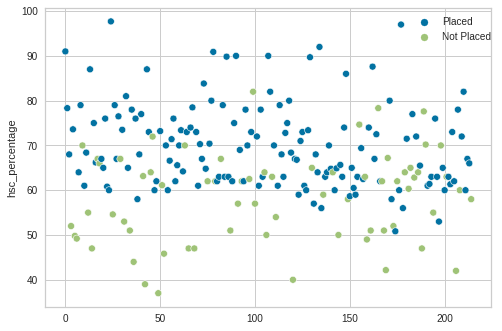

In [11]:
sns.scatterplot(x=data.index,y=data['hsc_percentage'],hue=data['status'])
plt.legend(bbox_to_anchor=(1.02,1))

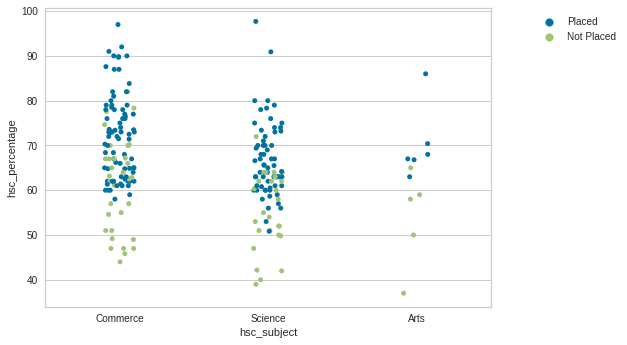

In [12]:
sns.stripplot(data=data,x='hsc_subject',y='hsc_percentage',hue='status')
plt.legend(bbox_to_anchor=(1.3,1))

<AxesSubplot:xlabel='hsc_board', ylabel='hsc_percentage'>

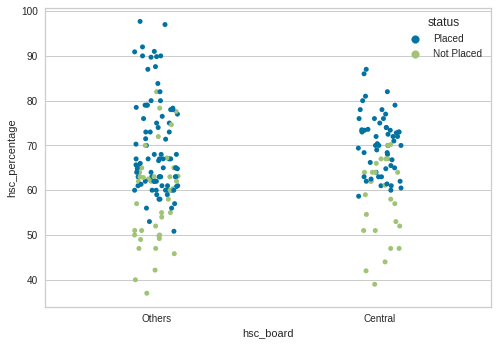

In [13]:
sns.stripplot(data=data,x='hsc_board',y='hsc_percentage',hue='status')

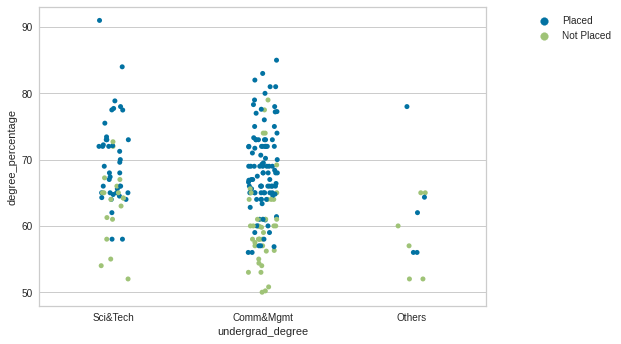

In [14]:
sns.stripplot(data=data,x='undergrad_degree',y='degree_percentage',hue='status')
plt.legend(bbox_to_anchor=(1.3,1))

<AxesSubplot:xlabel='undergrad_degree', ylabel='count'>

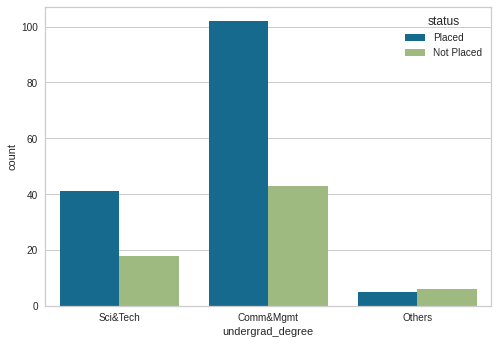

In [15]:
sns.countplot(data=data,x='undergrad_degree',hue='status')

<AxesSubplot:xlabel='specialisation', ylabel='mba_percent'>

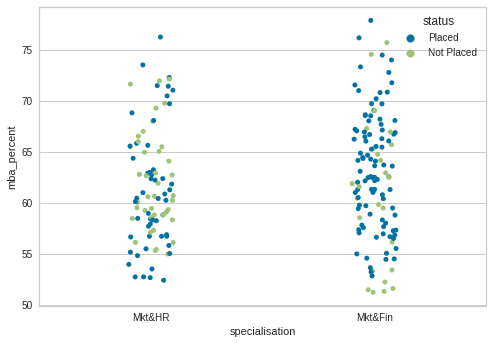

In [16]:
sns.stripplot(data=data,x='specialisation',y='mba_percent',hue='status')

<AxesSubplot:xlabel='specialisation', ylabel='count'>

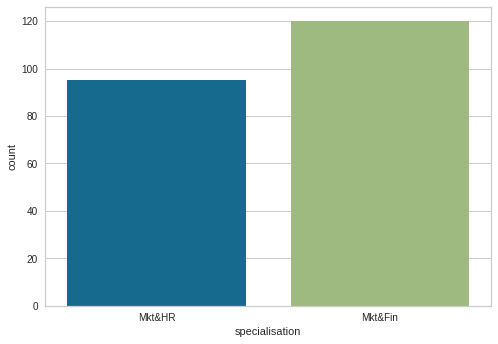

In [17]:
sns.countplot(x=data['specialisation'])

<AxesSubplot:xlabel='specialisation', ylabel='count'>

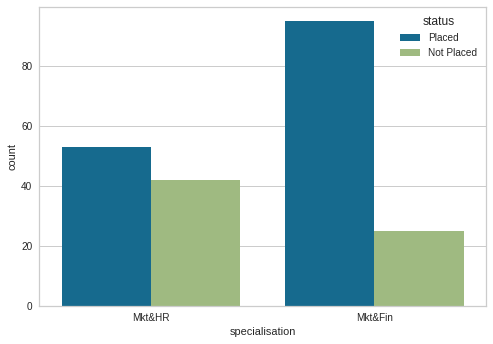

In [18]:
sns.countplot(data=data,x='specialisation',hue='status')

<AxesSubplot:xlabel='work_experience', ylabel='emp_test_percentage'>

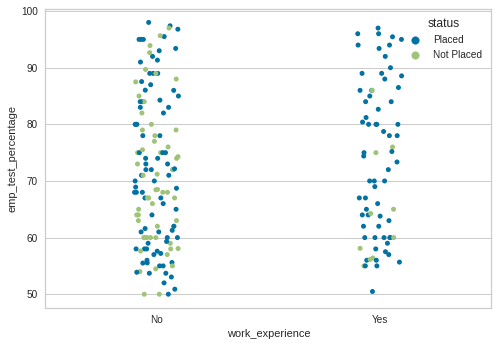

In [19]:
sns.stripplot(data=data,x='work_experience',y='emp_test_percentage',hue='status')

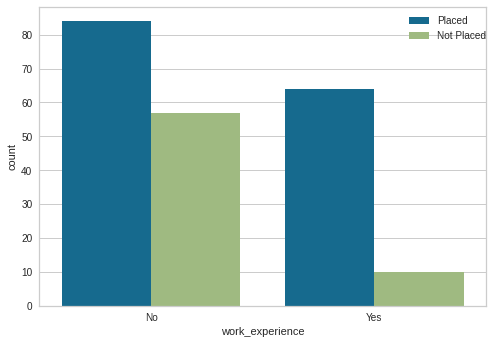

In [20]:
sns.countplot(data=data,x='work_experience',hue='status')
plt.legend(bbox_to_anchor=(1.02,1))

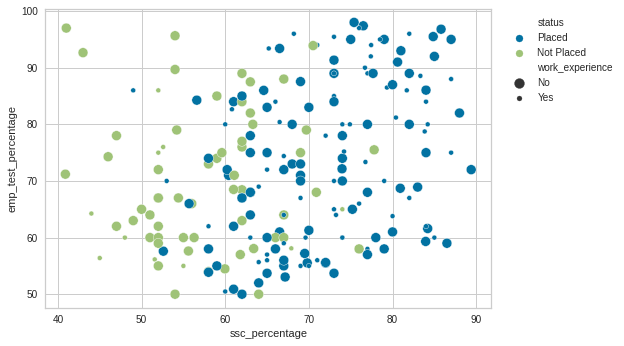

In [21]:
sns.scatterplot(data=data,x='ssc_percentage',y='emp_test_percentage',hue='status',size='work_experience')
plt.legend(bbox_to_anchor=(1.02,1))

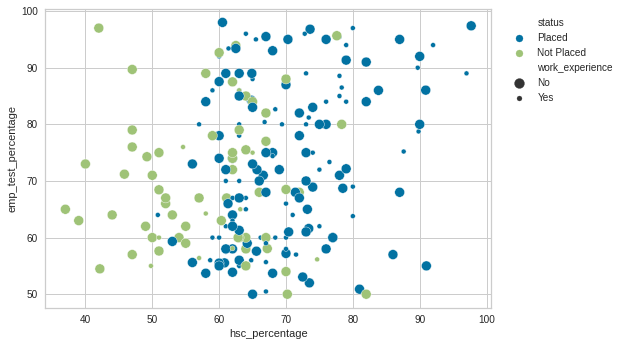

In [22]:
sns.scatterplot(data=data,x='hsc_percentage',y='emp_test_percentage',hue='status',size='work_experience')
plt.legend(bbox_to_anchor=(1.02,1))

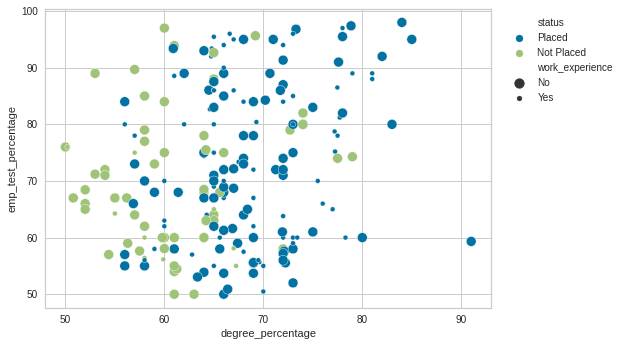

In [23]:
sns.scatterplot(data=data,x='degree_percentage',y='emp_test_percentage',hue='status',size='work_experience')
plt.legend(bbox_to_anchor=(1.02,1))

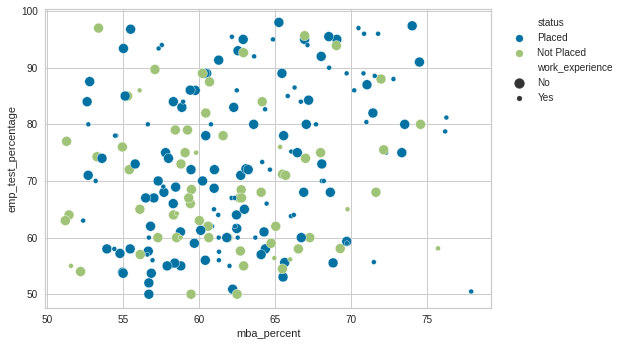

In [24]:
sns.scatterplot(data=data,x='mba_percent',y='emp_test_percentage',hue='status',size='work_experience')
plt.legend(bbox_to_anchor=(1.02,1))

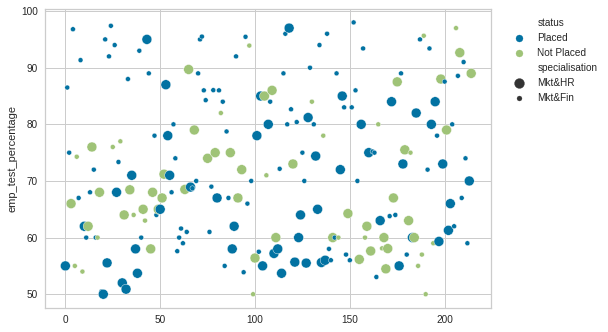

In [25]:
sns.scatterplot(data=data,x=data.index,y='emp_test_percentage',hue='status',size='specialisation')
plt.legend(bbox_to_anchor=(1.02,1))

**We have 5 float variables and 8 object type variables, so converting the object type data to numerical type.**

# **Encoding**

In [26]:
data['gender'].value_counts()
gender_n = {'M':0,'F':1}
data['gender']=data['gender'].map(gender_n)

In [27]:
data['ssc_board'].value_counts()
ssc = {'Central':0,'Others':1}
data['ssc_board'] = data['ssc_board'].map(ssc)

In [28]:
data['hsc_board'].value_counts()
hsc = {'Central':0,'Others':1}
data['hsc_board'] = data['hsc_board'].map(hsc)

In [29]:
data['hsc_subject'].value_counts()
data['undergrad_degree'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: undergrad_degree, dtype: int64

In [30]:
data['work_experience'].value_counts()
work = {'Yes':1,'No':0}
data['work_experience']=data['work_experience'].map(work)

In [31]:
data['specialisation'].value_counts()
spec = {'Mkt&Fin':1,'Mkt&HR':0}
data['specialisation'] = data['specialisation'].map(spec)

In [32]:
data['status'].value_counts()
status = {'Placed':1,'Not Placed':0}
data['status'] = data['status'].map(status)

In [33]:
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,0,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,0,58.80,1
1,0,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,1,66.28,1
2,0,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,1,57.80,1
3,0,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,0,59.43,0
4,0,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,1,82.00,1,Commerce,77.60,Comm&Mgmt,0,91.0,1,74.49,1
211,0,58.00,1,60.00,1,Science,72.00,Sci&Tech,0,74.0,1,53.62,1
212,0,67.00,1,67.00,1,Commerce,73.00,Comm&Mgmt,1,59.0,1,69.72,1
213,1,74.00,1,66.00,1,Commerce,58.00,Comm&Mgmt,0,70.0,0,60.23,1


In [34]:
data = pd.get_dummies(data,drop_first=True)
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,status,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech
0,0,67.00,1,91.00,1,58.00,0,55.0,0,58.80,1,1,0,0,1
1,0,79.33,0,78.33,1,77.48,1,86.5,1,66.28,1,0,1,0,1
2,0,65.00,0,68.00,0,64.00,0,75.0,1,57.80,1,0,0,0,0
3,0,56.00,0,52.00,0,52.00,0,66.0,0,59.43,0,0,1,0,1
4,0,85.80,0,73.60,0,73.30,0,96.8,1,55.50,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,1,82.00,1,77.60,0,91.0,1,74.49,1,1,0,0,0
211,0,58.00,1,60.00,1,72.00,0,74.0,1,53.62,1,0,1,0,1
212,0,67.00,1,67.00,1,73.00,1,59.0,1,69.72,1,1,0,0,0
213,1,74.00,1,66.00,1,58.00,0,70.0,0,60.23,1,1,0,0,0


In [35]:
data.describe()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,status,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.303395,0.460465,66.333163,0.609302,66.370186,0.344186,72.100558,0.558140,62.278186,0.688372,0.525581,0.423256,0.051163,0.274419
std,0.479168,10.827205,0.499598,10.897509,0.489045,7.358743,0.476211,13.275956,0.497767,5.833385,0.464240,0.500510,0.495228,0.220844,0.447262
min,0.000000,40.890000,0.000000,37.000000,0.000000,50.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,61.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,67.000000,0.000000,65.000000,1.000000,66.000000,0.000000,71.000000,1.000000,62.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,72.000000,1.000000,83.500000,1.000000,66.255000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,1.000000,98.000000,1.000000,77.890000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
data.corr()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,status,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech
gender,1.000000,0.068969,-0.019429,0.021334,-0.065945,0.173217,-0.085153,-0.084294,-0.106160,0.300531,-0.090670,0.001087,-0.042682,0.093246,-0.084072
ssc_percentage,0.068969,1.000000,0.116194,0.511472,0.066996,0.538404,0.175675,0.261993,0.172536,0.388478,0.607889,-0.101323,0.189847,-0.066127,0.221235
ssc_board,-0.019429,0.116194,1.000000,-0.137013,0.605883,0.038070,-0.040744,-0.018991,0.051565,0.083120,0.037297,-0.056671,0.058505,-0.002758,0.101060
hsc_percentage,0.021334,0.511472,-0.137013,1.000000,-0.019548,0.434206,0.141025,0.245113,0.241630,0.354823,0.491228,0.258093,-0.226675,-0.131382,-0.053599
hsc_board,-0.065945,0.066996,0.605883,-0.019548,1.000000,0.067229,0.038357,0.039108,-0.002232,0.090201,0.016945,-0.073522,0.126446,-0.116920,0.086548
degree_percentage,0.173217,0.538404,0.038070,0.434206,0.067229,1.000000,0.122648,0.224470,0.218286,0.402364,0.479861,-0.022724,0.092006,-0.180408,0.123477
work_experience,-0.085153,0.175675,-0.040744,0.141025,0.038357,0.122648,1.000000,0.056735,0.191174,0.168811,0.276060,-0.056719,0.033270,0.009507,0.102962
emp_test_percentage,-0.084294,0.261993,-0.018991,0.245113,0.039108,0.224470,0.056735,1.000000,0.236315,0.218055,0.127639,-0.021732,0.055352,0.006907,0.009748
specialisation,-0.106160,0.172536,0.051565,0.241630,-0.002232,0.218286,0.191174,0.236315,1.000000,0.105728,0.250655,0.129985,-0.166639,-0.090948,-0.061503
mba_percent,0.300531,0.388478,0.083120,0.354823,0.090201,0.402364,0.168811,0.218055,0.105728,1.000000,0.076922,-0.049415,0.048050,-0.036055,0.125009


<AxesSubplot:>

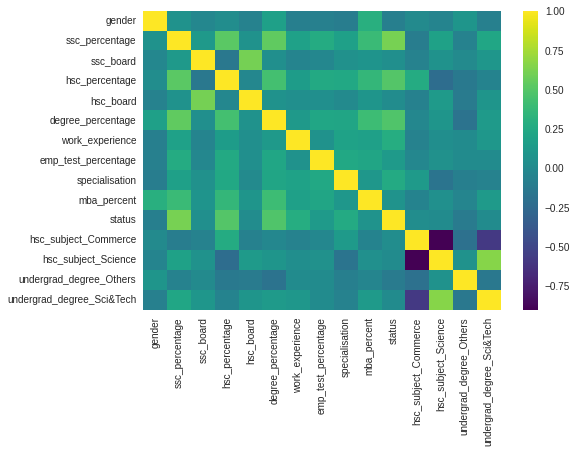

In [37]:
sns.heatmap(data.corr(),cmap='viridis')

# **ML Algorithms**

In [38]:
features = data.columns.tolist()
features = set(features)-{'status'}
x_train,x_test,y_train,y_test = train_test_split(data[features],data.status,test_size=0.2)


**1. Logistic Regression**

0.9069767441860465
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.88      1.00      0.94        30

    accuracy                           0.91        43
   macro avg       0.94      0.85      0.88        43
weighted avg       0.92      0.91      0.90        43



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


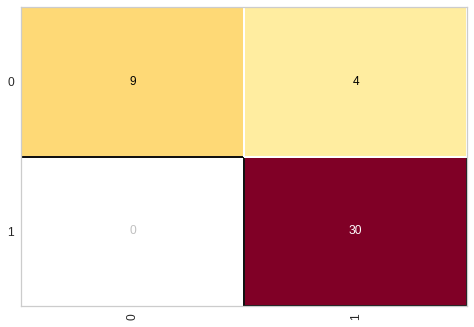

In [39]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)
pred_log = log_reg.predict(x_test)
acc_log = accuracy_score(y_test,pred_log)
print(acc_log)
cm = ConfusionMatrix(log_reg)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
conf_log = confusion_matrix(y_test,pred_log)
conf_log
logistic_normal = (classification_report(y_test, pred_log))
print(logistic_normal)

**2. Support Vector Machines**

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.83      1.00      0.91        30

    accuracy                           0.86        43
   macro avg       0.92      0.77      0.80        43
weighted avg       0.88      0.86      0.85        43

0.8604651162790697


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 7,  6],
       [ 0, 30]])

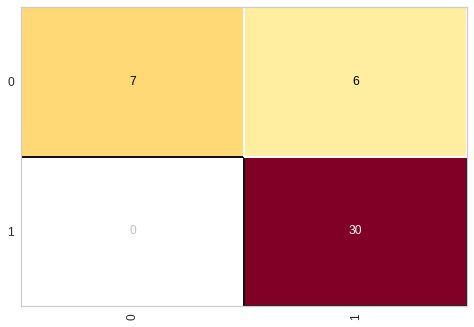

In [41]:
svm = SVC(kernel='poly',degree=4)
svm.fit(x_train,y_train)
pred_svm = svm.predict(x_test)
acc_svm = accuracy_score(y_test,pred_svm)
cm = ConfusionMatrix(svm)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
svm = classification_report(y_test, pred_svm)
print(svm)
print(acc_svm)
conf_svm = confusion_matrix(y_test,pred_svm)
conf_svm

**3. Gaussian Naive Bayes**

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43

0.8372093023255814


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([[ 8,  5],
       [ 2, 28]])

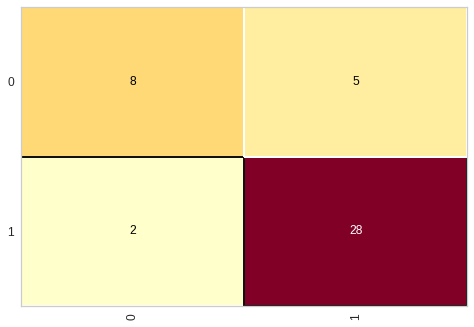

In [44]:
gaussianNB = GaussianNB()
gaussianNB.fit(x_train,y_train)
pred_gaussianNB = gaussianNB.predict(x_test)
acc_gaussianNB = accuracy_score(y_test,pred_gaussianNB)
cm = ConfusionMatrix(gaussianNB)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
gaussianNB = classification_report(y_test, pred_gaussianNB)
print(gaussianNB)
print(acc_gaussianNB)
conf_gaussianNB = confusion_matrix(y_test,pred_gaussianNB)
conf_gaussianNB

**4. K-nearest Neighbor**

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.83      1.00      0.91        30

    accuracy                           0.86        43
   macro avg       0.92      0.77      0.80        43
weighted avg       0.88      0.86      0.85        43

0.8604651162790697


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[ 7,  6],
       [ 0, 30]])

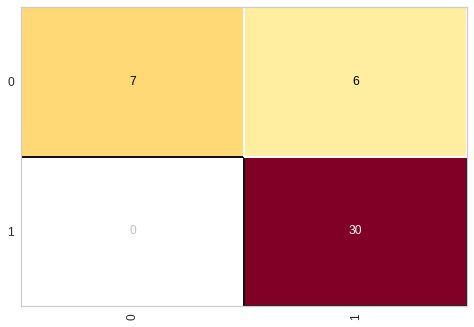

In [45]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
acc_knn = accuracy_score(y_test,pred_knn)
cm = ConfusionMatrix(knn)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
knn = classification_report(y_test, pred_knn)
print(knn)
print(acc_knn)
conf_knn = confusion_matrix(y_test,pred_knn)
conf_knn

**5. Decision Tree**

              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.83      0.97      0.89        30

    accuracy                           0.84        43
   macro avg       0.85      0.75      0.78        43
weighted avg       0.84      0.84      0.82        43

0.8372093023255814


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[ 7,  6],
       [ 1, 29]])

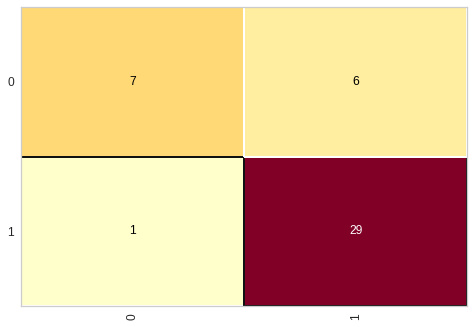

In [46]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(x_train,y_train)
pred_tree = decision_tree.predict(x_test)
acc_tree = accuracy_score(y_test,pred_tree)
cm = ConfusionMatrix(decision_tree)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
decision_tree = classification_report(y_test, pred_tree)
print(decision_tree)
print(acc_tree)
conf_tree = confusion_matrix(y_test,pred_tree)
conf_tree

**6. Random Forest**

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.85      0.97      0.91        30

    accuracy                           0.86        43
   macro avg       0.87      0.79      0.82        43
weighted avg       0.86      0.86      0.85        43

0.8604651162790697


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[ 8,  5],
       [ 1, 29]])

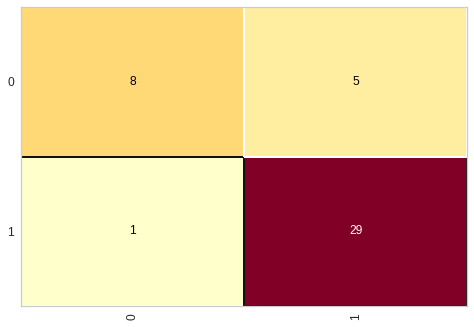

In [47]:
rand_forest = RandomForestClassifier()
rand_forest.fit(x_train,y_train)
pred_forest = rand_forest.predict(x_test)
acc_forest = accuracy_score(y_test,pred_forest)
cm = ConfusionMatrix(rand_forest)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
rand_forest = classification_report(y_test, pred_forest)
print(rand_forest)
print(acc_forest)
conf_forest = confusion_matrix(y_test,pred_forest)
conf_forest

**7. XGB Classifier**

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.94      1.00      0.97        30

    accuracy                           0.95        43
   macro avg       0.97      0.92      0.94        43
weighted avg       0.96      0.95      0.95        43

0.9534883720930233


array([[11,  2],
       [ 0, 30]])

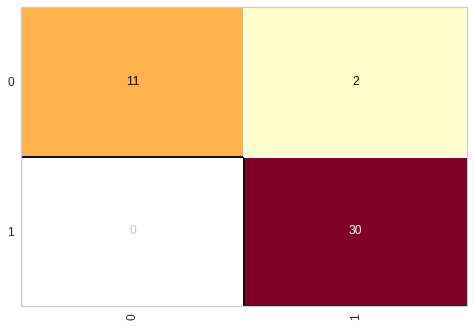

In [48]:
xgb = XGBClassifier(n_estimators=200)
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
acc_xgb = accuracy_score(y_test,pred_xgb)
cm = ConfusionMatrix(xgb)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
xgb = classification_report(y_test, pred_xgb)
print(xgb)
print(acc_xgb)
conf_xgb = confusion_matrix(y_test,pred_xgb)
conf_xgb